# Example of Stationary Periodic Signals 

In [9]:
# An R Package of time series tools and utilities; Rmetrics - Financial Time Series Objects
#https://www.rdocumentation.org/packages/timeSeries
#install.packages("timeSeries")
require(timeSeries)

# An R package with a collection of econometric functions for performance and risk analysis
#https://www.rdocumentation.org/packages/PerformanceAnalytics
#install.packages("PerformanceAnalytics")
require(PerformanceAnalytics)

# An R package for Wavelet analysis and reconstruction of time series, 
# cross-wavelets and phase-difference (with filtering options), 
# significance with simulation algorithms.
# https://www.rdocumentation.org/packages/WaveletComp/versions/1.0
#install.packages("WaveletComp")
require(WaveletComp)

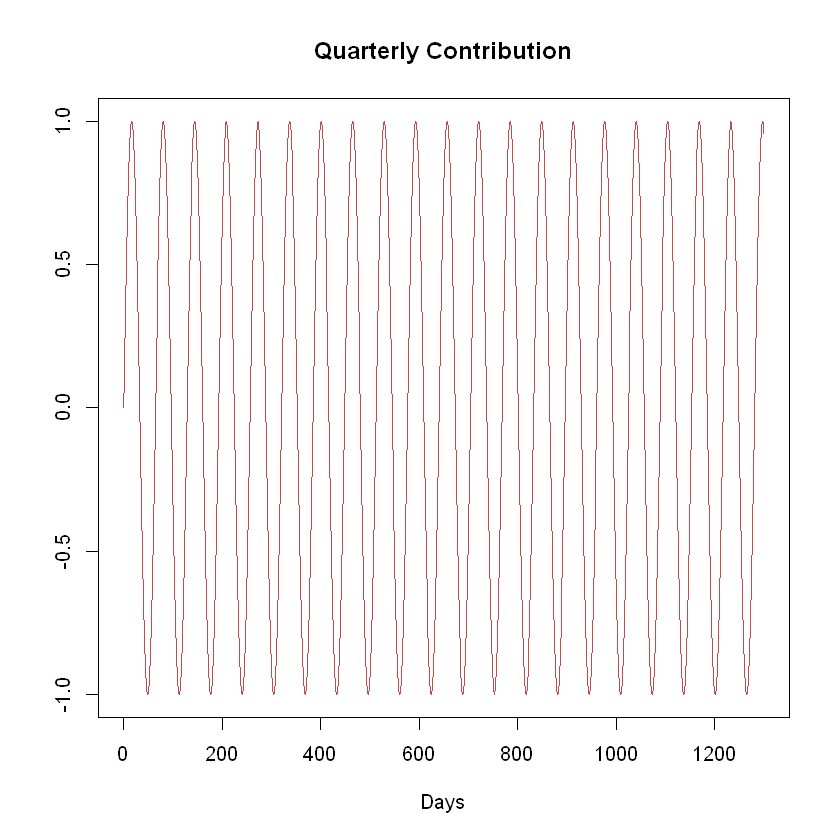

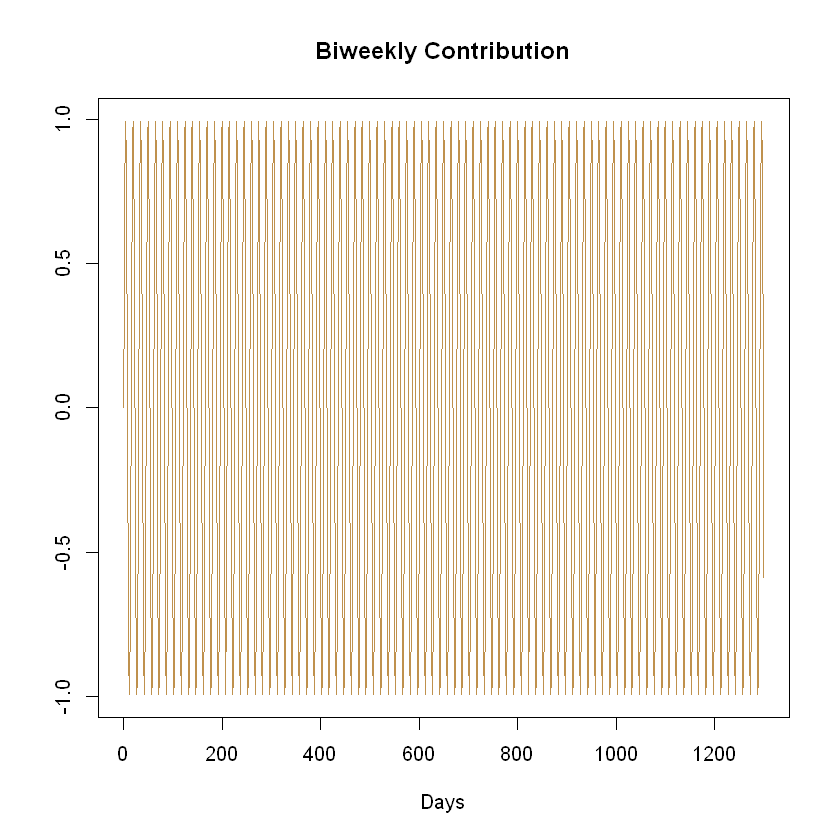

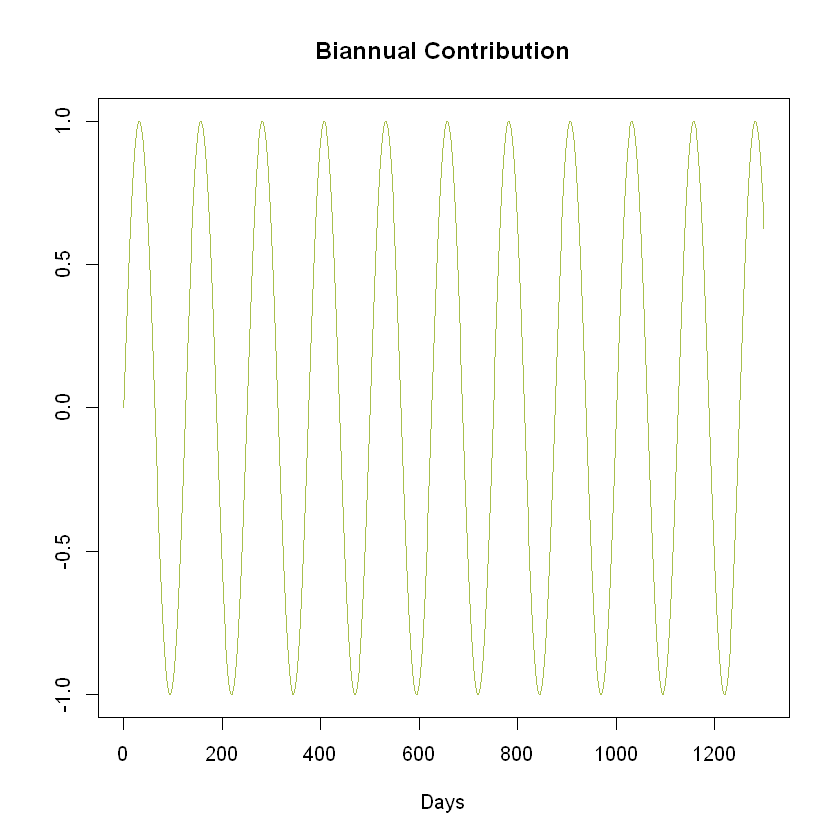

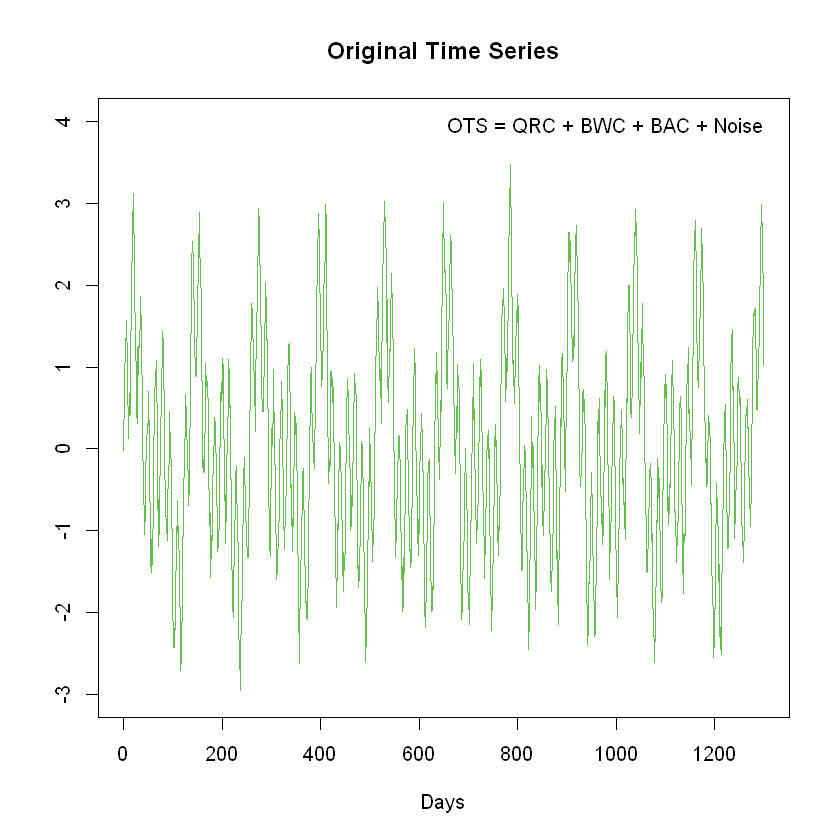

In [10]:
# Quarterly Investment Horizon
x1 <- periodic.series(start.period = 64, length = 1300)
plot.ts(x1, main = "Quarterly Contribution", ylab = " ", xlab = "Days", col = rainbow10equal[1])
# Biweekly Investment Horizon
x2 <- periodic.series(start.period = 15, length = 1300)
plot.ts(x2, main = "Biweekly Contribution", ylab = " ", xlab = "Days", col = rainbow10equal[2])
# Biannual Investment Horizon
x3 <- periodic.series(start.period = 125, length = 1300)
plot.ts(x3, main = "Biannual Contribution", ylab = " ", xlab = "Days", col = rainbow10equal[3])

#Add up all the contributions and some noise together
x <- x1 + x2 + x3 + 0.2*rnorm(1300)

# Plot the original series (or the series that was decomposed above into the three componets and noise)
plot.ts(x, main = "Original Time Series", ylab = " ", xlab = "Days", col = rainbow10equal[4], ylim = c(-3, 4))
legend("topright", legend = "OTS = QRC + BWC + BAC + Noise", bty = "n")

# CWT Power Spectrum

Starting wavelet transformation...
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


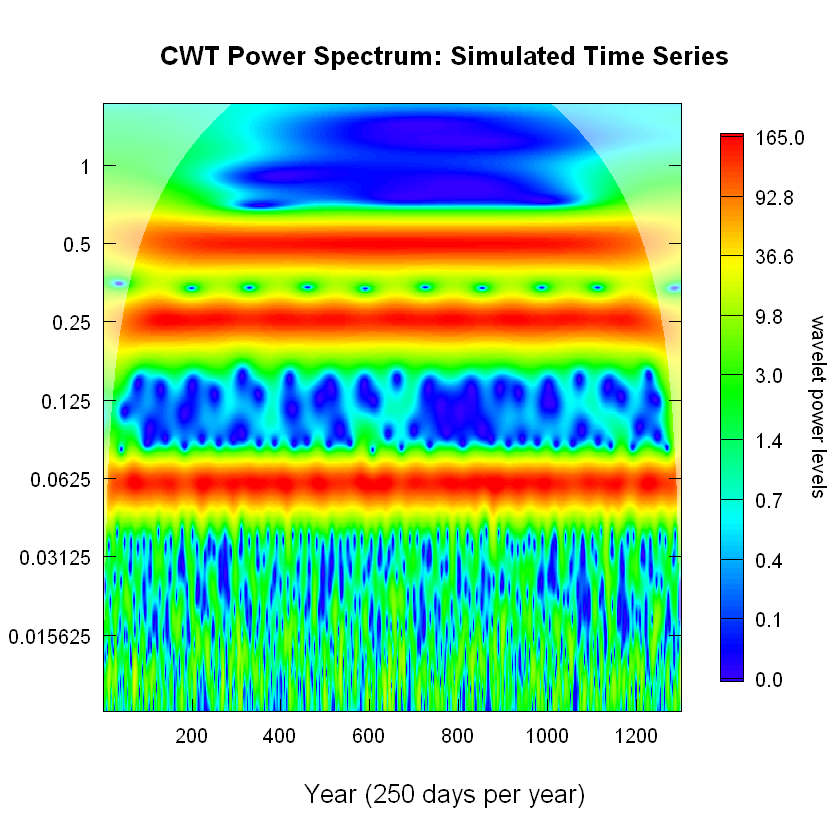

In [11]:
# Place the additive series in a data.frame
my.data <- data.frame(x = x)

# Analyze the time series using a the package WaveletComp

# For help on the exact arguments of this function see:
?analyze.wavelet

# my.data: data frame of time series (including header, and dates as row names or as separate column named "date" if available)
# my.series: name or column index indicating the series to be analyzed
# loess.span: parameter alpha in loess controlling the degree of time series smoothing, 
# if the time series is to be detrended; no detrending if loess.span = 0
# dt: time resolution, i.e. sampling resolution in the time domain, 1/dt = number of observations per time unit.
# dj: frequency resolution, i.e. sampling resolution in the frequency domain, 1/dj.

my.w <- analyze.wavelet(my.data = my.data, my.series = "x", loess.span = 0, dt = 1/250, dj = 1/64, make.pval = F, n.sim = 10)

#Plot the wavelet image
# For help on the exact arguments of this plotting function see:
?wt.image

wt.image(my.w, periodlab = " ",timelab = "  " , main = " ",
legend.params = list(lab = "wavelet power levels", mar = 5.1, cex = 4, n.ticks = 10), 
         color.key = "quantile", lwd = 2, plot.ridge = FALSE)
title("CWT Power Spectrum: Simulated Time Series", cex.main = 1.3, 
      xlab = "Year (250 days per year)", ylab = " ", cex.lab = 1.3)

# References

R Core Team (2018). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. URL https://www.R-project.org/.

Diethelm Wuertz, Tobias Setz and Yohan Chalabi (2017). timeSeries: Rmetrics - Financial Time Series Objects. R package version 3042.102. https://CRAN.R-project.org/package=timeSeries

Brian G. Peterson and Peter Carl (2018). PerformanceAnalytics: Econometric Tools for Performance and Risk Analysis. R package version 1.5.2. https://CRAN.R-project.org/package=PerformanceAnalytics

Angi Roesch and Harald Schmidbauer (2018). WaveletComp: Computational Wavelet Analysis. R package version 1.1. https://CRAN.R-project.org/package=WaveletComp